### PREDICTING OF HEART DISEASE USING MACHINE LEARNING
This note boook make use of python based libraries in predicting if a person has heart disease or not.

The following approach will be used 
1. Problem Definition 
2. Data
3. Evaluation 
4. Features 
5. Modelling 
6. Experimentation

## 1. Problem Definition 
In a statement made by CMD Bowen University Teaching Hospital, they have got tons of data about heart diseased patients, which they will like to use to predict if a patient has heart disease or not inorder to make doctors diagnosis easier

## 2. Data 
The data used was extracted from the hospital health database.

## 3. Evaluation 
During this project is defined by the ability of the model to reach 95% accuracy and precision.

## 4. Features
Data dictionary 

## Preparing of Tools 


In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
heart_disease = pd.read_csv("./heart_disease/heart2-disease.csv")

In [34]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [35]:
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [36]:
heart_disease.isna().value_counts()

age    sex    cp     trestbps  chol   fbs    restecg  thalach  exang  oldpeak  slope  ca     thal   target
False  False  False  False     False  False  False    False    False  False    False  False  False  False     303
dtype: int64

In [37]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


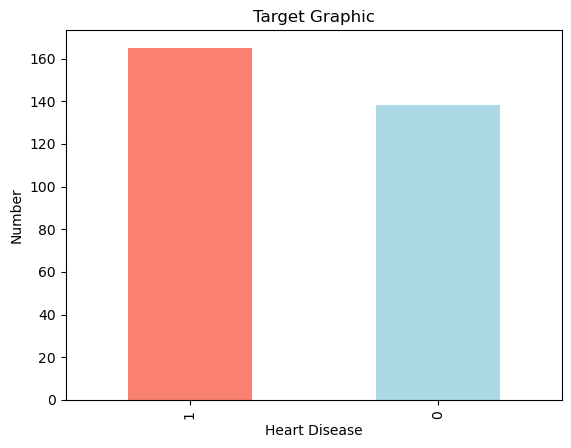

In [32]:
heart_disease["target"].value_counts().plot(kind="bar",
                                           color=["salmon","lightblue"],
                                           xlabel = "Heart Disease",
                                           ylabel= "Number",
                                           title="Target Graphic");

### Finding Pattern
Finding relationship between variables to find patterns


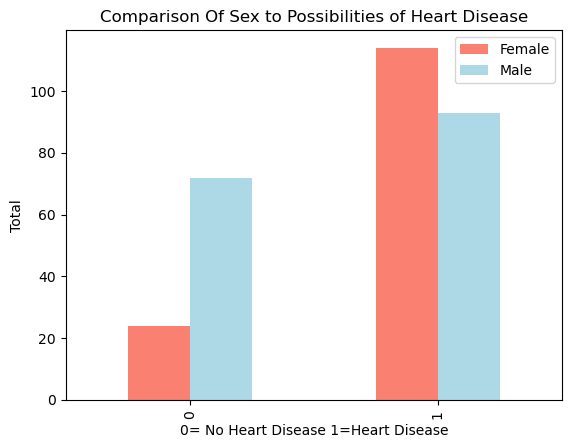

In [47]:
##Comparing the relationship between sex and probability of heart disease

pd.crosstab(heart_disease.sex, heart_disease.target).plot(kind="bar",
                                                         color=["salmon","lightblue"]);

plt.title("Comparison Of Sex to Possibilities of Heart Disease")
plt.xlabel("0= No Heart Disease 1=Heart Disease")
plt.ylabel("Total")
plt.legend(["Female","Male"]);

In [48]:
heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Age vs. Maximum Rate Achieve.
Comparing age to thalach in relation to probability of having an Heart Disease


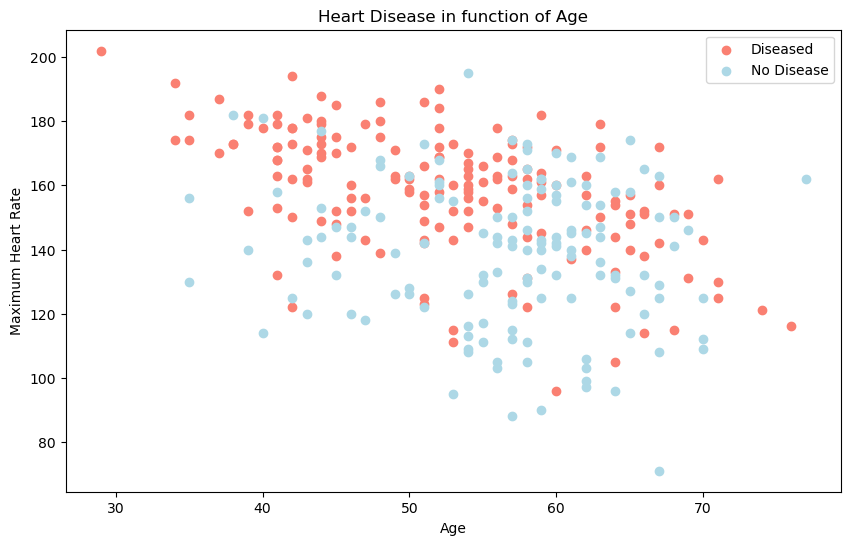

In [52]:

plt.figure(figsize=(10,6))

plt.scatter(heart_disease.age[heart_disease.target==1],
           heart_disease.thalach[heart_disease.target==1],
           color="salmon")

plt.scatter(heart_disease.age[heart_disease.target==0],
           heart_disease.thalach[heart_disease.target==0],
           color= "lightblue")

plt.title("Heart Disease in function of Age")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend(["Diseased","No Disease"]);

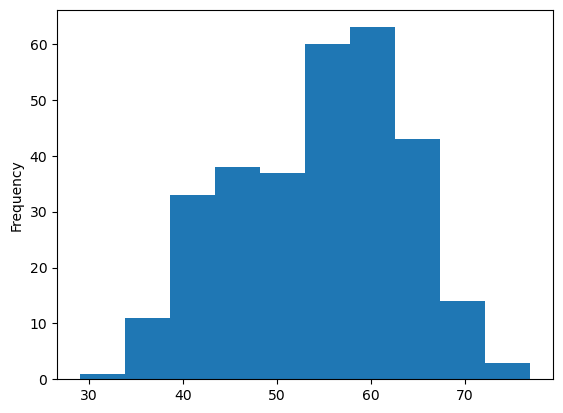

In [55]:
#Check the Age distribution 

heart_disease.age.plot.hist();

### Heart Disease per Chest Pain

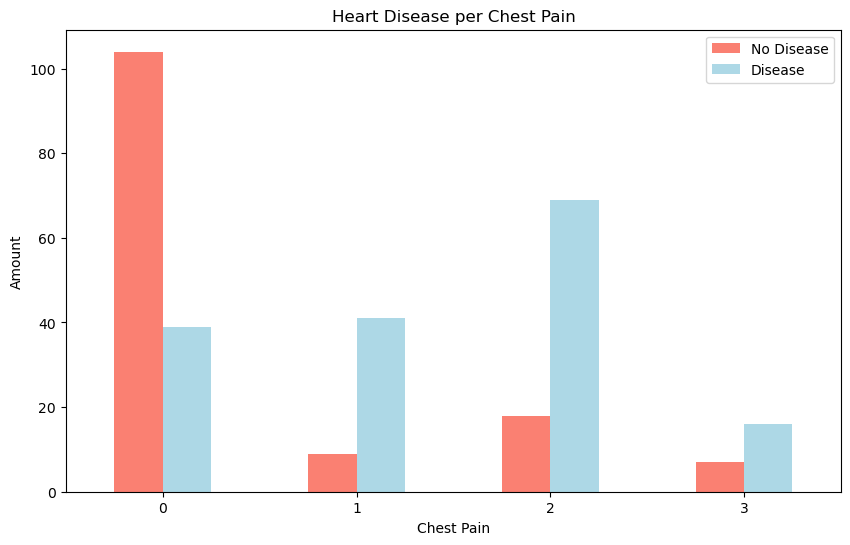

In [61]:
pd.crosstab(heart_disease.cp, heart_disease.target).plot(kind="bar", figsize=(10,6),
                                                        color=["salmon", "lightblue"])

plt.xlabel("Chest Pain")
plt.ylabel("Amount")
plt.title("Heart Disease per Chest Pain")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [63]:
h_corr = heart_disease.corr()
h_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


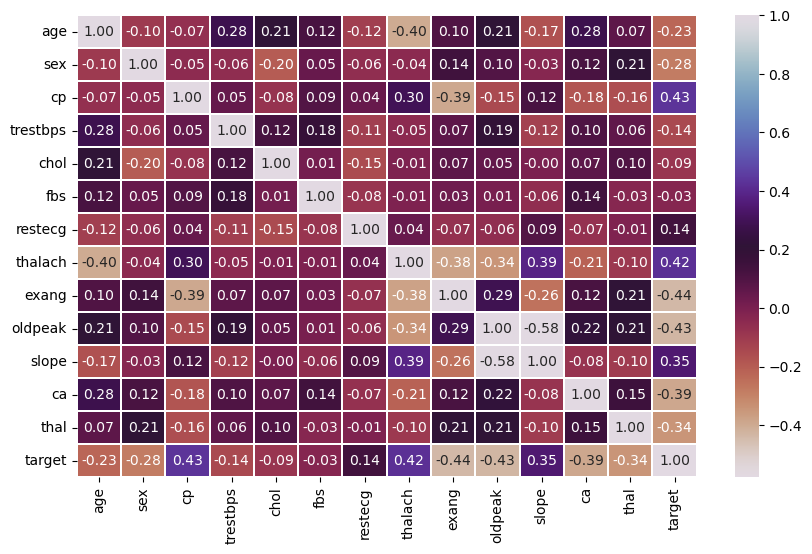

In [75]:
ax,fig = plt.subplots(figsize=(10,6))

ax = sns.heatmap(h_corr,
           annot=True, 
            linewidths=0.2,
           fmt = "0.2f",
           cmap="twilight_r");

  ## Modelling 

In [78]:
## Preparing of Tools for modelling

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import f1_score, precision_score, confusion_matrix,classification_report,recall_score, plot_roc_curve

In [79]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [89]:
## Splitting of data to X and Y
 
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

## Splitting of data to training and test

np.random.seed(45)
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2) 

In [125]:
## Training of maachine model using comparing three machine model(KNN,LogisticRegression & RandomForest) for accuracy

models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression" : LogisticRegression(),
    "Random Forest" : RandomForestClassifier()
    
}


def model_compare(models, x_train,y_train,x_test,y_test):
    np.random.seed(45)
    model_score = {}
    for names, model in models.items():
        clf = model.fit(x_train,y_train)
        model_score[names] = clf.score(x_test,y_test)
    return model_score
        
        

In [126]:
m_compare = model_compare(models=models,
                         x_train=x_train,
                         y_train=y_train,
                         x_test=x_test,
                         y_test=y_test)
m_compare

/Users/Daniel/Desktop/analysis_env/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6721311475409836,
 'Logistic Regression': 0.9016393442622951,
 'Random Forest': 0.8852459016393442}

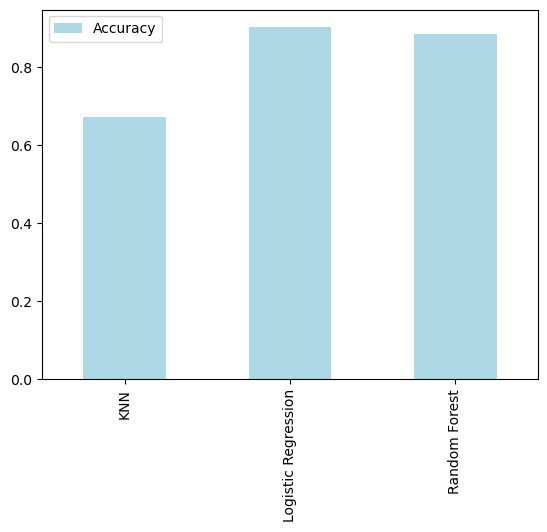

In [136]:
mf = pd.DataFrame(m_compare, index=["Accuracy"])

mf.T.plot.bar(color=["lightblue"]);

### Hyperparameter Tuning

Tuning of the K Nearest Neighbor accuracy 

In [145]:
train_score = []
test_score = []
## Creating a list of values for neighbors
neighbors = range(1,21)
## Setting up KNN instance
knn = KNeighborsClassifier()
## Looping through different neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #fit Algorithm
    knn.fit(x_train,y_train)
    
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test, y_test))


The Maximum KNN score on Test Data is: 73.77%


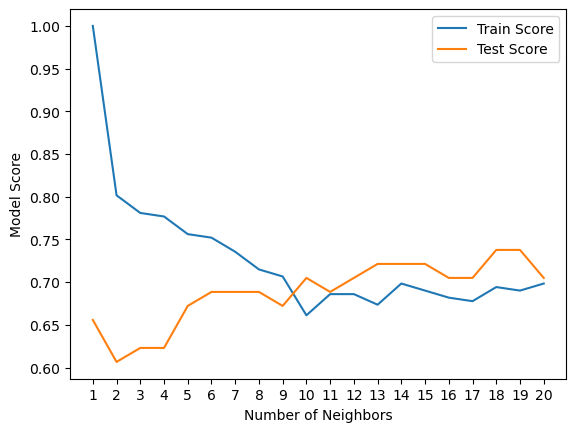

In [144]:
plt.plot(neighbors,train_score,label="Train Score")
plt.plot(neighbors,test_score, label="Test Score")

plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

plt.xticks(np.arange(1,21,1))

print(f"The Maximum KNN score on Test Data is: {max(test_score)*100:.2f}%")

### Hyperparameter tuning
Tuning of Logistic Regression and RandomForest using RandomizedCV

In [156]:
## Creating parameter grid for logistic regression

log_grid = {
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"]
}

## Creating parameter grid for Random Forest 

rf = {
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None, 3, 5, 10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf" : np.arange(1,20,2)
}

In [151]:
## Tuning LogisticRegression using RandomizedSearchCV

lrg = RandomizedSearchCV(LogisticRegression(),
                        param_distributions=log_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

lrg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [152]:
lrg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [153]:
lrg.score(x_test,y_test)

0.9016393442622951

In [157]:
## Tuning of RandomForest using RandomSearchCV

rf_cv = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=rf,
                          cv=5,
                          n_iter=20,
                          verbose=True)
rf_cv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [158]:
rf_cv.best_params_

{'n_estimators': 760,
 'min_samples_split': 16,
 'min_samples_leaf': 7,
 'max_depth': 5}

In [159]:
rf_cv.score(x_test,y_test)

0.8524590163934426

### Hyperparameter tuning
Tuning of Logistic Regression using GridSearchCV

In [161]:
lr_grid = {
    "C":np.logspace(-4,4,40),
    "solver" : ["liblinear"]
}

lr_grid_cv = GridSearchCV(LogisticRegression(),
                         param_grid=lr_grid,
                         cv=5,
                         verbose=True)

lr_grid_cv.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.07029063e-01, 4.923882...652287e-01,
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [162]:
lr_grid_cv.best_params_

{'C': 0.30702906297578497, 'solver': 'liblinear'}

In [163]:
lr_grid_cv.score(x_test,y_test)

0.9016393442622951

In [164]:
y_preds = lr_grid_cv.predict(x_test)
y_preds

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0])

/Users/Daniel/Desktop/analysis_env/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


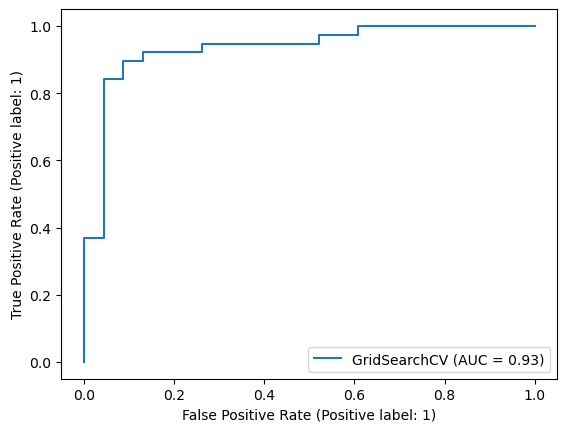

In [167]:
## Plot ROC curve and calculating AUC 

plot_roc_curve(lr_grid_cv,
              x_test,
              y_test);

In [211]:
y_test

104    1
100    1
125    1
69     1
83     1
      ..
162    1
205    0
122    1
99     1
139    1
Name: target, Length: 61, dtype: int64

In [212]:
y_preds

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
print(confusion_matrix(y_test,y_preds))

In [ ]:
# ## Plotting Confusion Matrix

# sns.set(font_scale=1.5)

# def plot_confusion_mat (y_test, y_preds):
#     fig,ax = plt.subplots(figsize=(3,3))
#     ax = sns.heatmap(confusion_matrix(y_test,y_preds),
#                annot=True,
#                cbar=False)
#     plt.xlabel("True Label")
#     plt.ylabel("Predicted Label")
    
# plot_confusion_mat(y_test=y_test,
#                      y_preds=y_preds
                     )

In [173]:
print(classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           0       0.87      0.87      0.87        23
           1       0.92      0.92      0.92        38

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



## Evaluation of LogisticRegression Model Using Cross_Val_Score

In [176]:
lr_grid_cv.best_params_


{'C': 0.30702906297578497, 'solver': 'liblinear'}

In [179]:
clf = LogisticRegression(C= 0.30702906297578497, 
                         solver= 'liblinear')

In [184]:
##Cross Validation for Accuracy

cv_accuracy = cross_val_score(clf,
                             x,
                             y,
                             cv=5,
                             scoring="accuracy")
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8446994535519126

In [185]:
## Cross Validation for Precision

cv_precision = cross_val_score(clf,
                              x,
                              y,
                              cv=5,
                              scoring="precision")

cv_precision = np.mean(cv_precision)
cv_precision

0.8209150326797385

In [186]:
## Cross Validation for Recall
cv_recall = cross_val_score(clf,
                           x,
                           y,
                           cv=5,
                           scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [187]:
## Cross Validation for F1-Score

cv_f1 = cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.867291890754684

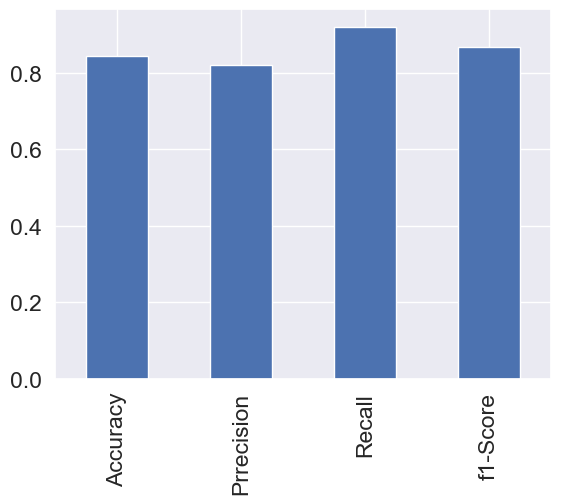

In [193]:
## Visualizing the Cross Validation Score Evaluation 

cross_viz = pd.DataFrame({"Accuracy":cv_accuracy,
                         "Prrecision":cv_precision,
                         "Recall": cv_recall,
                         "f1-Score":cv_f1},
                        index=[0])

cross_viz.T.plot.bar(legend=False);

## Feature Importance 


In [194]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [199]:
clf = LogisticRegression(C= 0.30702906297578497, 
                         solver= 'liblinear')

clf.fit(x_train, y_train)

LogisticRegression(C=0.30702906297578497, solver='liblinear')

In [200]:
clf.coef_

array([[ 0.00945172, -1.12760991,  0.6793453 , -0.01407323, -0.00312478,
         0.01813068,  0.33383125,  0.02619011, -0.66462404, -0.53167518,
         0.51051747, -0.60297941, -0.62272161]])

In [201]:
feature_dict = dict(zip(heart_disease.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.009451718844208468,
 'sex': -1.1276099100299282,
 'cp': 0.6793452989629605,
 'trestbps': -0.014073233880520725,
 'chol': -0.0031247756682512935,
 'fbs': 0.01813067693392413,
 'restecg': 0.3338312544228045,
 'thalach': 0.026190109159410765,
 'exang': -0.6646240415338038,
 'oldpeak': -0.5316751790444928,
 'slope': 0.5105174736260848,
 'ca': -0.6029794079771228,
 'thal': -0.6227216133877634}

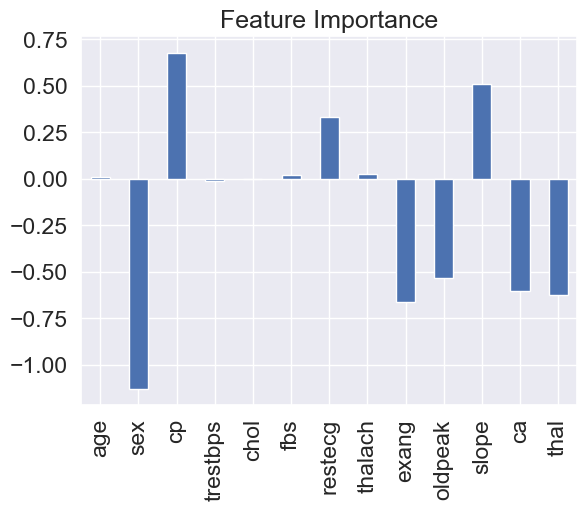

In [208]:
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(legend=False, title="Feature Importance");